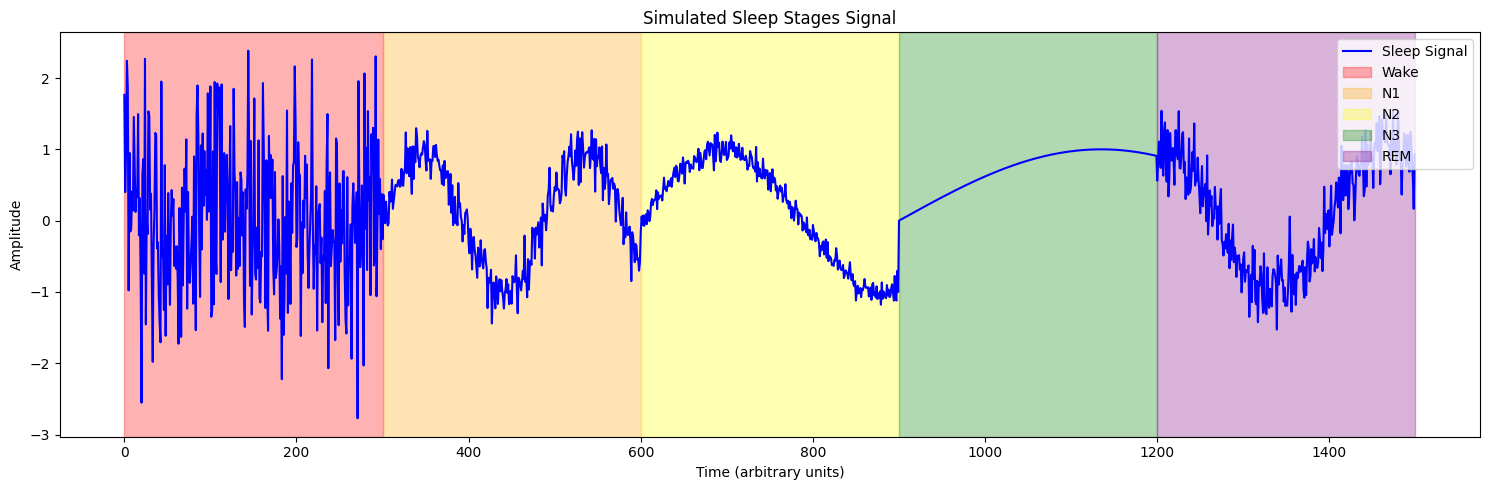

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(0)

# Define the length of each sleep stage signal
signal_length = 300  # Number of data points per stage

# Generate simulated sleep signals for each stage
wake_signal = np.random.normal(0, 1, signal_length)  # High frequency, high amplitude
n1_signal = np.sin(np.linspace(0, 10, signal_length)) + np.random.normal(0, 0.2, signal_length)  # Mixed frequency
n2_signal = np.sin(np.linspace(0, 5, signal_length)) + np.random.normal(0, 0.1, signal_length)  # Lower frequency
n3_signal = np.sin(np.linspace(0, 2, signal_length))  # Low frequency, large amplitude
rem_signal = np.cos(np.linspace(0, 7, signal_length)) + np.random.normal(0, 0.3, signal_length)  # REM sleep pattern

# Concatenate all signals to create a complete sleep cycle
complete_signal = np.concatenate([wake_signal, n1_signal, n2_signal, n3_signal, rem_signal])
labels = ['Wake'] * signal_length + ['N1'] * signal_length + ['N2'] * signal_length + ['N3'] * signal_length + ['REM'] * signal_length

# Create a plot of the sleep stage signals
plt.figure(figsize=(15, 5))
plt.plot(complete_signal, label='Sleep Signal', color='b')
plt.title('Simulated Sleep Stages Signal')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Amplitude')

# Annotate the different sleep stages on the plot
plt.axvspan(0, signal_length, color='red', alpha=0.3, label='Wake')
plt.axvspan(signal_length, 2*signal_length, color='orange', alpha=0.3, label='N1')
plt.axvspan(2*signal_length, 3*signal_length, color='yellow', alpha=0.3, label='N2')
plt.axvspan(3*signal_length, 4*signal_length, color='green', alpha=0.3, label='N3')
plt.axvspan(4*signal_length, 5*signal_length, color='purple', alpha=0.3, label='REM')

# Add legend and show plot
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


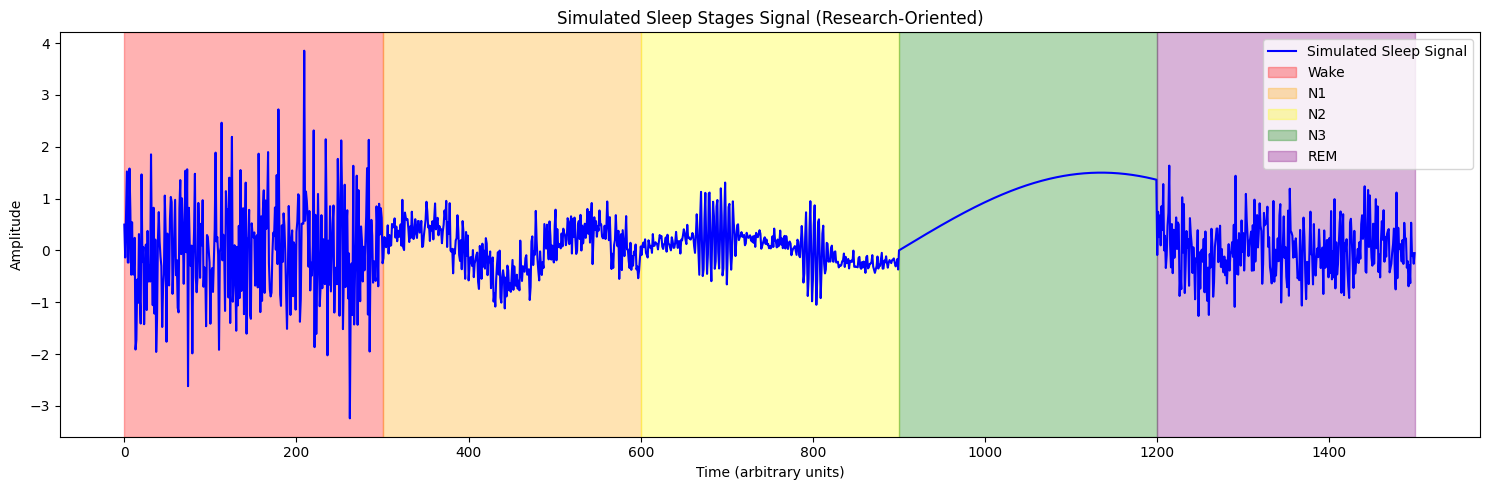

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Define the length of each sleep stage signal
signal_length = 300  # Number of data points per stage

# Simulate different sleep stages
def generate_wake_signal(length):
    return np.random.normal(0, 1, length)

def generate_n1_signal(length):
    return 0.5 * np.sin(np.linspace(0, 10, length)) + np.random.normal(0, 0.3, length)

def generate_n2_signal(length):
    # Simulate sleep spindles in stage N2
    base_signal = 0.3 * np.sin(np.linspace(0, 5, length)) + np.random.normal(0, 0.1, length)
    spindle = np.sin(np.linspace(0, 20 * np.pi, 50)) * np.hanning(50)  # Simulated spindle
    positions = np.random.choice(range(50, length - 50), size=3, replace=False)
    for pos in positions:
        base_signal[pos:pos + 50] += spindle
    return base_signal

def generate_n3_signal(length):
    return 1.5 * np.sin(np.linspace(0, 2, length))  # Delta waves (slow waves)

def generate_rem_signal(length):
    return 0.2 * np.cos(np.linspace(0, 15, length)) + np.random.normal(0, 0.5, length)

# Generate signals for each sleep stage
wake_signal = generate_wake_signal(signal_length)
n1_signal = generate_n1_signal(signal_length)
n2_signal = generate_n2_signal(signal_length)
n3_signal = generate_n3_signal(signal_length)
rem_signal = generate_rem_signal(signal_length)

# Concatenate all signals to create a complete sleep cycle
complete_signal = np.concatenate([wake_signal, n1_signal, n2_signal, n3_signal, rem_signal])
labels = ['Wake'] * signal_length + ['N1'] * signal_length + ['N2'] * signal_length + ['N3'] * signal_length + ['REM'] * signal_length

# Create a plot of the sleep stage signals
plt.figure(figsize=(15, 5))
plt.plot(complete_signal, label='Simulated Sleep Signal', color='b')
plt.title('Simulated Sleep Stages Signal (Research-Oriented)')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Amplitude')

# Annotate the different sleep stages on the plot
plt.axvspan(0, signal_length, color='red', alpha=0.3, label='Wake')
plt.axvspan(signal_length, 2*signal_length, color='orange', alpha=0.3, label='N1')
plt.axvspan(2*signal_length, 3*signal_length, color='yellow', alpha=0.3, label='N2')
plt.axvspan(3*signal_length, 4*signal_length, color='green', alpha=0.3, label='N3')
plt.axvspan(4*signal_length, 5*signal_length, color='purple', alpha=0.3, label='REM')

# Add legend and show plot
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


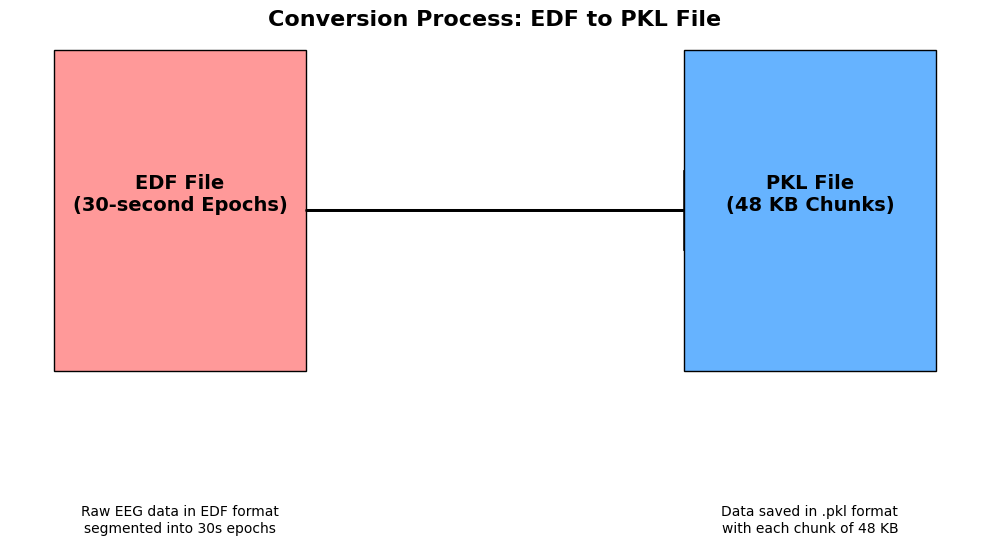

In [9]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Initialize the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for the boxes
edf_color = "#ff9999"
pkl_color = "#66b3ff"

# Step 1: Show EDF file loading
ax.text(0.25, 0.7, 'EDF File\n(30-second Epochs)', fontsize=14, weight='bold', ha='center', color='black')
ax.add_patch(Rectangle((0.15, 0.6), 0.2, 0.2, edgecolor='black', facecolor=edf_color))

# Arrow indicating the conversion process
ax.arrow(0.35, 0.7, 0.3, 0, head_width=0.05, head_length=0.05, fc='black', ec='black')

# Step 2: Save to PKL file
ax.text(0.75, 0.7, 'PKL File\n(48 KB Chunks)', fontsize=14, weight='bold', ha='center', color='black')
ax.add_patch(Rectangle((0.65, 0.6), 0.2, 0.2, edgecolor='black', facecolor=pkl_color))

# Additional descriptions
ax.text(0.25, 0.5, 'Raw EEG data in EDF format\nsegmented into 30s epochs', fontsize=10, ha='center', color='black')
ax.text(0.75, 0.5, 'Data saved in .pkl format\nwith each chunk of 48 KB', fontsize=10, ha='center', color='black')

# Remove axes
ax.axis('off')

# Set plot title
plt.title('Conversion Process: EDF to PKL File', fontsize=16, weight='bold')

# Show the plot
plt.tight_layout()
plt.show()


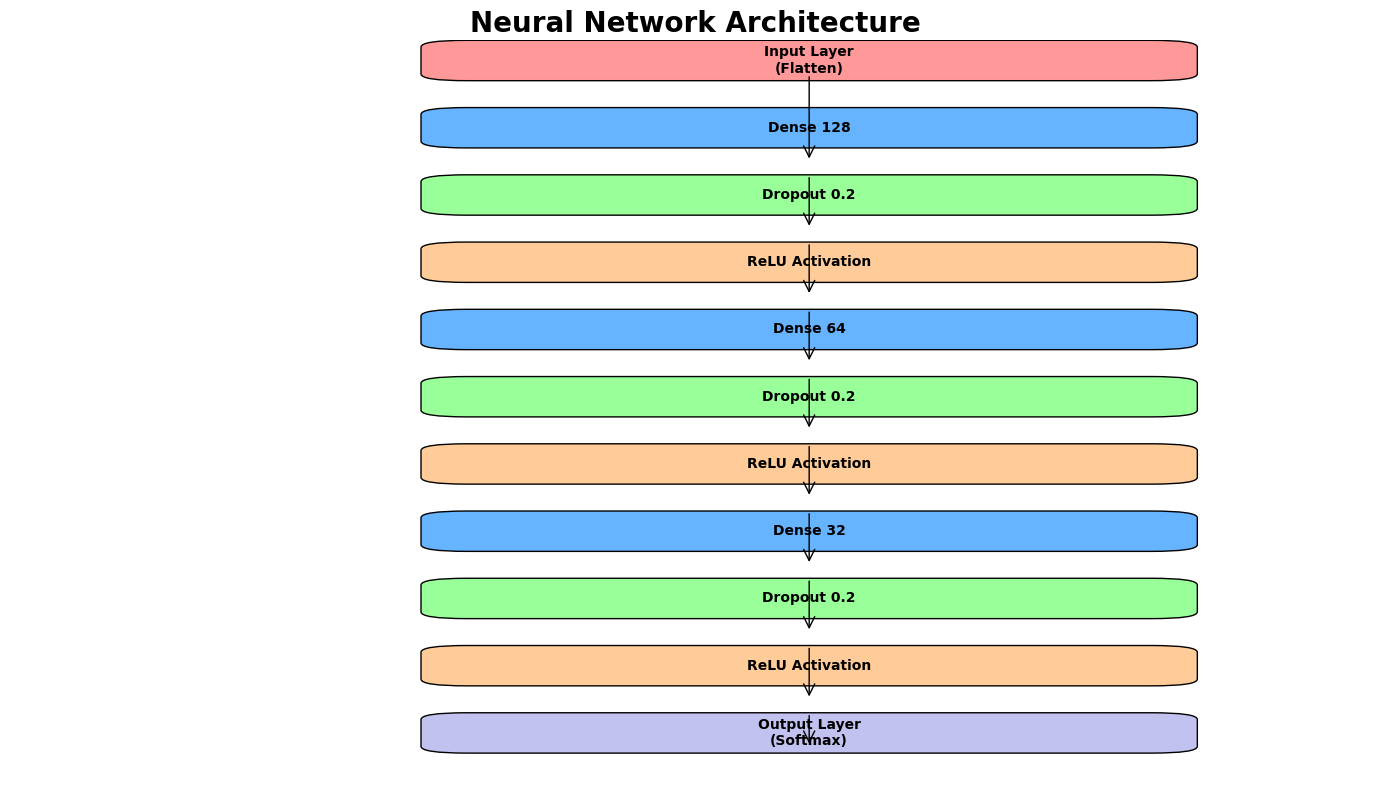

In [16]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

# Function to draw a layer box with text
def draw_layer(ax, x, y, width, height, text, color):
    rect = FancyBboxPatch((x, y), width, height, boxstyle="round,pad=0.1", edgecolor='black', facecolor=color)
    ax.add_patch(rect)
    ax.text(x + width / 2, y + height / 2, text, fontsize=10, ha='center', va='center', weight='bold')

# Function to draw arrows between layers
def draw_arrow(start, end):
    arrow = FancyArrowPatch(start, end, mutation_scale=20, color='black', lw=1, arrowstyle='->')
    ax.add_patch(arrow)

# Initialize the figure
fig, ax = plt.subplots(figsize=(14, 8))

# Define layer colors
input_color = "#ff9999"  # Light red for input layer
dense_color = "#66b3ff"   # Light blue for dense layers
dropout_color = "#99ff99" # Light green for dropout layers
activation_color = "#ffcc99"  # Light orange for activation layers
output_color = "#c2c2f0"  # Light purple for output layer

# Define layer properties
layer_width = 1.5
layer_height = 0.4
layer_spacing = 1.0  # Increased vertical spacing between layers

# Input layer (Flatten)
draw_layer(ax, 0, 6.5, layer_width, layer_height, "Input Layer\n(Flatten)", input_color)

# First Dense layer + Dropout + Activation
draw_layer(ax, 0, 5.5, layer_width, layer_height, "Dense 128", dense_color)
draw_layer(ax, 0, 4.5, layer_width, layer_height, "Dropout 0.2", dropout_color)
draw_layer(ax, 0, 3.5, layer_width, layer_height, "ReLU Activation", activation_color)

# Second Dense layer + Dropout + Activation
draw_layer(ax, 0, 2.5, layer_width, layer_height, "Dense 64", dense_color)
draw_layer(ax, 0, 1.5, layer_width, layer_height, "Dropout 0.2", dropout_color)
draw_layer(ax, 0, 0.5, layer_width, layer_height, "ReLU Activation", activation_color)

# Third Dense layer + Dropout + Activation
draw_layer(ax, 0, -0.5, layer_width, layer_height, "Dense 32", dense_color)
draw_layer(ax, 0, -1.5, layer_width, layer_height, "Dropout 0.2", dropout_color)
draw_layer(ax, 0, -2.5, layer_width, layer_height, "ReLU Activation", activation_color)

# Output layer
draw_layer(ax, 0, -3.5, layer_width, layer_height, "Output Layer\n(Softmax)", output_color)

# Draw arrows between layers with adjusted vertical positions
arrow_y_start = [6.5, 5.0, 4.0, 3.0, 2.0, 1.0, 0.0, -1.0, -2.0, -3.0]
arrow_y_end = [5.2, 4.2, 3.2, 2.2, 1.2, 0.2, -0.8, -1.8, -2.8, -3.5]

for start, end in zip(arrow_y_start, arrow_y_end):
    draw_arrow((0 + layer_width / 2, start), (0 + layer_width / 2, end))

# Set up the axes limits
ax.set_xlim(-1, 2)
ax.set_ylim(-4, 7)

# Remove axes
ax.axis('off')

# Set plot title
plt.title('Neural Network Architecture', fontsize=20, weight='bold')

# Show the plot
plt.tight_layout()
plt.show()
